# Mapping a target state to a generating circuit


In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from graphiq.backends.stabilizer.compiler import StabilizerCompiler
from graphiq.state import QuantumState
from graphiq.metrics import Infidelity, CircuitDepth
from graphiq.solvers.deterministic_solver import DeterministicSolver

import networkx as nx

In [8]:
compiler = StabilizerCompiler()
graph = nx.Graph([(0, 1), (1, 2), (2, 3)])
target = QuantumState(graph, rep_type="graph")
metric = Infidelity(target)

In [10]:
solver = DeterministicSolver(
    target=target,
    metric=metric,
    compiler=compiler,
)

The fidelity between the target and generated states is 1.0
Circuit depth is 9


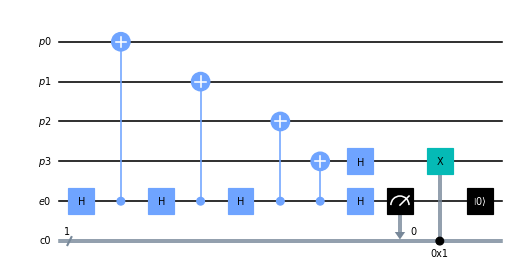

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [19]:
solver.solve()
score, circuit = solver.result
print(f"The fidelity between the target and generated states is {1 - score}")
depth = CircuitDepth()
print(f"Circuit depth is {depth.evaluate(state=None, circuit=circuit)}")
circuit.draw_circuit()